# Chart Patter Identifier


## Model Training

Download and extract the dataset

In [1]:
!gdown --id 1KGIilYQ1l-GZrCKvviJQbvsgJG7Oh0-0


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KGIilYQ1l-GZrCKvviJQbvsgJG7Oh0-0
To: /content/DATASET.zip
100% 3.20M/3.20M [00:00<00:00, 225MB/s]


In [2]:
!unzip DATASET.zip


Archive:  DATASET.zip
   creating: DATASET/
   creating: DATASET/output/
  inflating: DATASET/output/Double-Top.png  
   creating: DATASET/train_set/
   creating: DATASET/train_set/Ascending_Triangle/
  inflating: DATASET/train_set/Ascending_Triangle/AT_01.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_02.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_03.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_04.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_05.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_06.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_07.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_08.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_09.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_10.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_11.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_12.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_13

Verify that the data is there

In [3]:
from PIL import Image
from IPython.display import display

In [4]:
im = Image.open('DATASET/train_set/Ascending_Triangle/AT_01.jpg')

In [5]:
!pip install tensorboardcolab

  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3834 sha256=2e42f4b9be76a05a2a4f33fa98e43e87662eb1b976ba7f84a02134323349bbc1
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


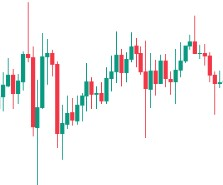

In [6]:
display(im)

In [7]:
import numpy as np
image_arr = np.array(im)
image_arr.shape
image_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Module import and variable initialization


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
# dimensions of our images.
img_width, img_height = 128, 128

In [10]:
train_data_dir = 'DATASET/train_set'
validation_data_dir = 'DATASET/val_set'
nb_train_samples = 140
nb_validation_samples = 70
epochs = 50
batch_size = 20

## Building the CNN model

In [11]:
#New Tensorflow model
input_shape = (img_width, img_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))


d2 = tf.keras.layers.Dense(64,activation='relu')
model.add(d2)

model.add(tf.keras.layers.Dropout(0.5))
d3 =  tf.keras.layers.Dense(7,activation='softmax')
model.add(d3)


model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [13]:
weights = d3.get_weights()
weights[1].shape

(7,)

## Formatting data

In [14]:
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [15]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 210 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


## Test the data feeders

In [16]:
datum = next(train_generator)
image_batch, label_batch = datum
image_batch.shape
k = 3
image = image_batch[k, ...]
label = label_batch[k, ...]

label

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

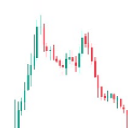

In [17]:
display(Image.fromarray((image * 255).astype(np.uint8)))

In [18]:
image_batch.shape

(20, 128, 128, 3)

## Train the model

In [ ]:
# tbc = TensorBoardColab()
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks = [tensorboard_callback]
)

<ipython-input-20-02639dcebc47>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
7/7 [==============================] - 13s 220ms/step - loss: 2.0711 - accuracy: 0.1462 - val_loss: 1.9541 - val_accuracy: 0.1333
Epoch 2/50
7/7 [==============================] - 1s 198ms/step - loss: 1.9521 - accuracy: 0.1308 - val_loss: 1.9464 - val_accuracy: 0.1500
Epoch 3/50
7/7 [==============================] - 2s 248ms/step - loss: 1.9517 - accuracy: 0.1429 - val_loss: 1.9446 - val_accuracy: 0.1833
Epoch 4/50
7/7 [==============================] - 2s 352ms/step - loss: 1.9481 - accuracy: 0.1000 - val_loss: 1.9455 - val_accuracy: 0.1667
Epoch 5/50
7/7 [==============================] - 1s 171ms/step - loss: 1.9555 - accuracy: 0.1385 - val_loss: 1.9439 - val_accuracy: 0.1333
Epoch 6/50
7/7 [==============================] - 1s 140ms/step - loss: 1.9598 - accuracy: 0.1071 - val_loss: 1.9423 - val_accuracy: 0.1833
Epoch 7/50
7/7 [==============================] - 1s 134ms/step - loss: 1.9479 - accuracy: 0.2154 - val_loss: 1.9399 - val_accuracy: 0.1500
Epoch 8/50
7/7 [===

## Save the weights/Load the weights

In [19]:
model.save_weights('model-1.h5')

In [20]:
model.load_weights('model-1.h5')

## Make predictions with the trained CNN!

In [21]:
from PIL import Image

In [22]:
im = Image.open('/content/DATASET/val_set/Ascending_Triangle/AT_21.jpg')

In [23]:
img = im.resize((128, 128))

In [24]:
img = np.array(img) / 255.

In [25]:
img.shape

(128, 128, 3)

In [26]:
img = img[np.newaxis, ...]

In [27]:
img.shape

(1, 128, 128, 3)

In [28]:
out = model.predict_on_batch(img)

In [29]:
out


array([[0.10784801, 0.09866706, 0.10055142, 0.10230321, 0.09948607,
        0.10130295, 0.09998011, 0.09188394, 0.09881798, 0.0991592 ]],
      dtype=float32)

In [30]:
np.sum(out)

0.99999994

In [31]:
from IPython.display import display, HTML, Image

In [32]:
np.argmax(out)

0

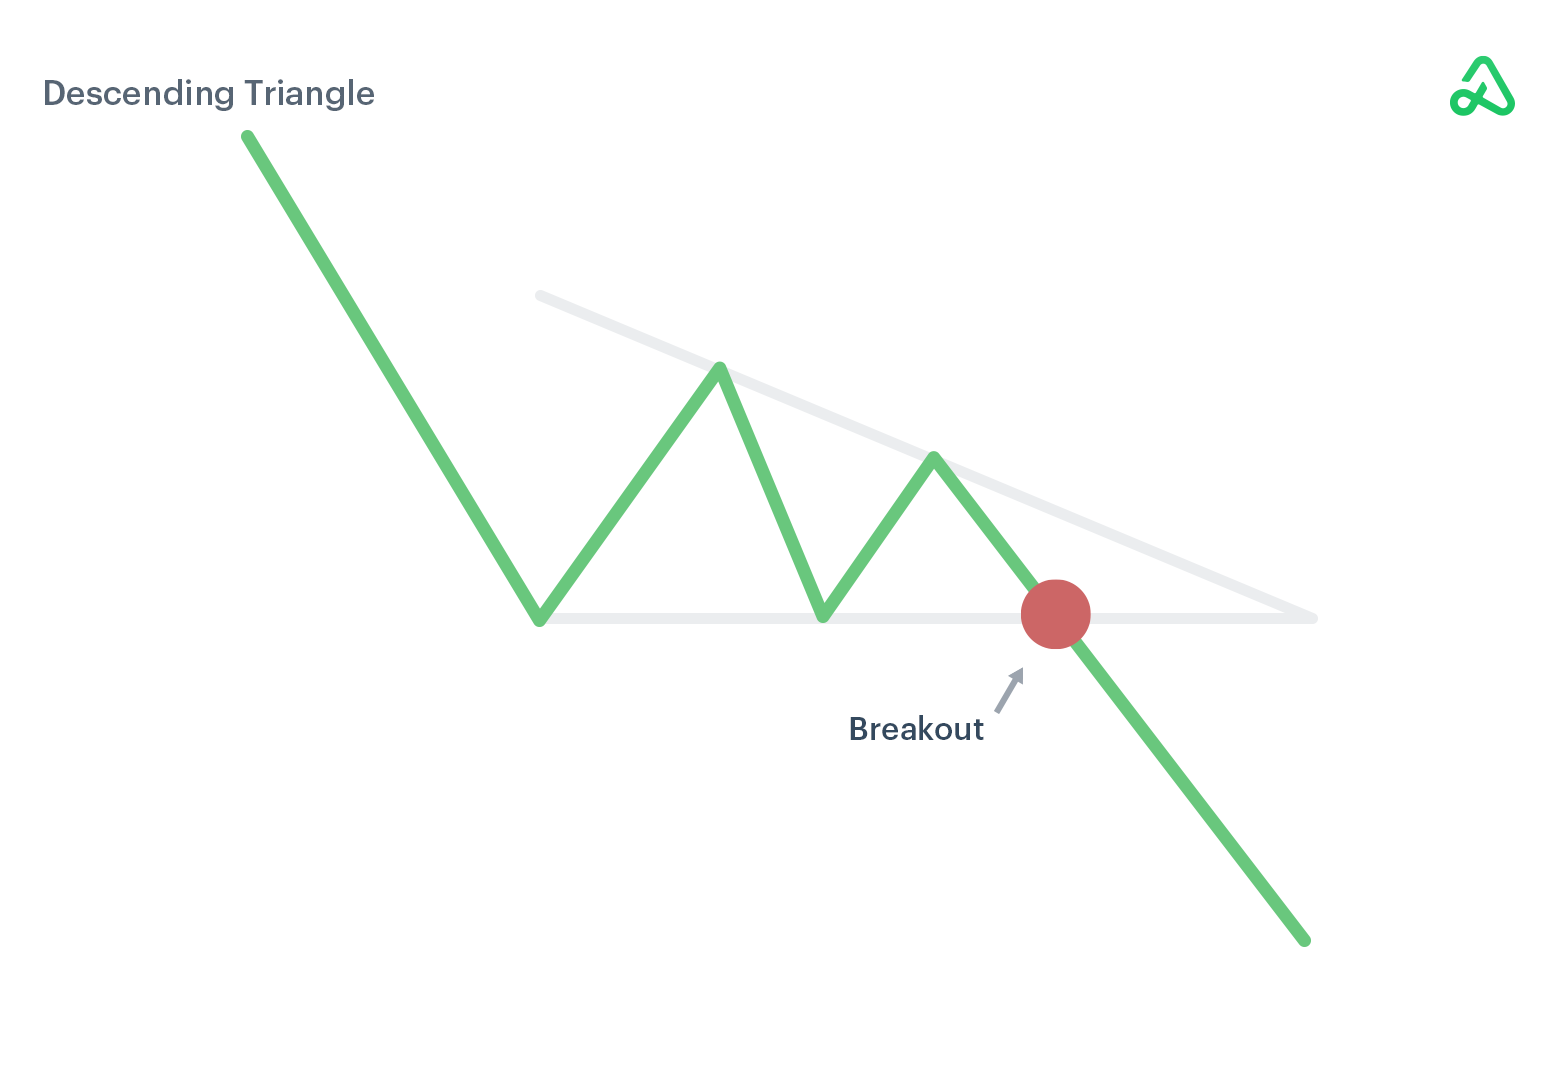

In [40]:
predicted_class = 8

if predicted_class == 0:
    output_text = f"<b>It is a ASCENDING TRIANGLE</b>"
    image_path ='/content/DATASET/output/Ascending_Triangle.png'
elif predicted_class == 1:
    output_text = "This is Class 1."
    image_path ='/content/DATASET/output/Descending_Triangle.png'
elif predicted_class == 2:
    output_text = "This is Class 2."
    image_path ='/content/DATASET/output/DoubleBottom_Traingle.png'
elif predicted_class == 3:
    output_text = f"<b>It is a DOUBLE TOP !!!</b><br><br><b>How To Draw It:</b><br><br><ul><li><b>Identify Peaks:</b> Look for two peaks in the price chart at roughly the same level. These represent resistance points.</li><li><b>Draw Neckline:</b> Connect the lows between the two peaks with a horizontal line. This is your neckline.</li></ul><br><br><b>How To Trade:</b><br><br><ul><li><b>Entry Point:</b> Initiate a short (sell) position once the price breaks below the neckline, confirming the double top pattern. This is typically a bearish signal.</li><li><b>Stop-Loss Placement:</b> To manage risk, place a stop-loss order just above the second peak (the second top). This level serves as a protective barrier if the price reverses and moves against your trade.</li><b>Take-Profit Level:</b> Estimate the potential price decline by measuring the distance from the neckline to the highest point of the pattern. Then, project this distance downward from the breakout point (below the neckline). This projection can be your initial take-profit target.</li><li><b>Partial Profits and Trailing Stops:</b> Consider taking partial profits at predefined levels as the price moves in your favor. Additionally, you may use trailing stop orders to secure profits as the price continues to decline.</li><li><b>Risk Management:</b> Implement sound risk management strategies, such as never risking more than a predetermined percentage of your trading capital on a single trade.</li></ul><br><br>"
    image_path ='/content/DATASET/output/DoubleTop_Triangle.png'
elif predicted_class == 4:
    output_text = "This is Class 4."
    image_path ='/content/DATASET/output/FallingWedge_Triangle.png'
elif predicted_class == 5:
    output_text = "This is Class 5."
    image_path ='/content/DATASET/output/RisingWedge_Triangle.png'
elif predicted_class == 6:
    output_text = "This is Class 6."
    image_path ='/content/DATASET/output/Symmetrical_Triangle.png'
else:
    output_text = "Class not recognized."
    image_path ='/content/DATASET/output/Descending_Triangle.png'


# Display the text
display(HTML(output_text))
display(Image(filename=image_path))